# Chapter 3. 신경망

퍼셉트론(Perceptron)은 복잡한 함수도 표현할 수 있지만, 가중치를 사람이 설정해줘야 하는 단점이 있음.
따라서, 현실적으로 복잡한 함수를 표현할 수가 없음.

이번 챕터에서는 이런 퍼셉트론의 단점을 신경망으로 해결해본다.

두 입력을 받아 y를 출력하는 퍼셉트론의 식은 아래와 같다.

$$
y=
\begin{cases}
0 \hspace{0.5em}( b+w_1x_1 + w_2x_2 \leq 0)\\
1 \hspace{0.5em}( b+w_1x_1 + w_2x_2 > 0)
\end{cases}
$$

b는 편향을, w1, w2는 신호의 가중치를 나타내는 매개변수로, 신호의 영향력을 제어한다.

함수를 이용하면, 아래와 같이 더 간단하게 표현할 수 있다.
$$y = h(X) = h(b + w_1x_1 + w_2x_2)$$

$$h(X) = \begin{cases} 0\hspace{0.5em} (X \leq 0)\\ 1\hspace{0.5em} (X \gt 0) \end{cases}$$

여기서 h 함수는 입력신호의 총합을 출력신호로 변환하는 함수이고, 일반적으로 활성화 함수(activation function)이라고 한다.

## Chapter 3.2 활성화 함수

바로 위 식과 같은 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 계단 함수라고 한다.
신경망에서는 추후에 나올 역전파를 이용하기 위해서, 다른 활성화 함수를 이용한다.

#### 3.2.1 Sigmoid

아래는 시그모이드 함수를 나타낸 식이다.

$$h(x) = \frac{1}{1 + e^{-x}}$$

신경망에서는 앞에서 본 퍼셉트런과 주된 차이는 활성화 함수 뿐이다. 아래 함수 등을 통해 시그모이드 함수와 계단 함수를 비교해본다.

#### Chapter 3.2.2 ~ 3.2.3 계단 함수 구현

In [4]:
def step_function(x):
    y = x > 0
    return y.astype(int)

In [5]:
# Test step functions
import numpy as np
x = np.asarray([-1.0, 1.0, 2.0])
print('x: ', x)
print('y: ', step_function(x))

x:  [-1.  1.  2.]
y:  [0 1 1]


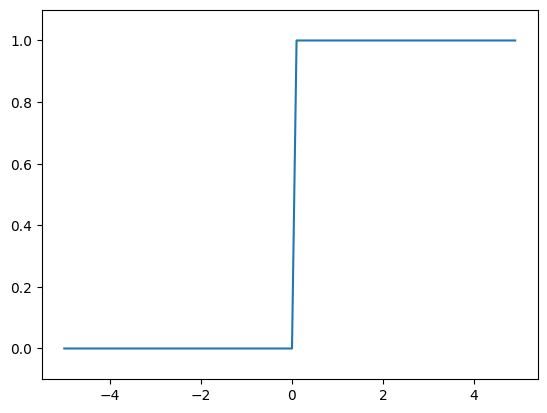

In [6]:
# Graph
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### Chapter 3.2.4 시그모이드 함수 구현하기

In [76]:
def sigmoid(_x):
    return 1 / (1 + np.exp(-_x))

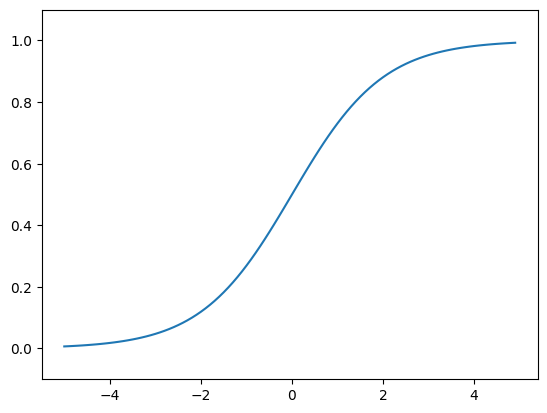

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 3.2.5 시그모이드 함수와 계단 함수 비교

두 함수를 같이 출력해보면, sigmoid는 계단 함수에 비해 매끈한 모습을 가지고 있다.
(수학적으로 표현하면, 시그모이드는 그래프에서 나타난 모든 점에서 미분 가능하다.)
그리고, 계단 함수는 두 값 0 또는 1만 갖지만, 시그모이드는 0~1 사이의 값을 연속적으로 전달한다.

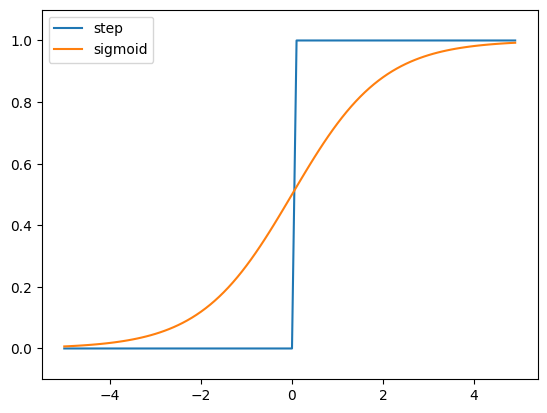

In [9]:
import numpy as np
import matplotlib.pylab as plt
x = np.arange(-5.0, 5.0, 0.1)
step_y = step_function(x)
sigmoid_y = sigmoid(x)

plt.plot(x, step_y)
plt.plot(x, sigmoid_y)
plt.ylim(-0.1, 1.1)
plt.legend(['step', 'sigmoid'])
plt.show()

#### 3.2.7 ReLU

ReLU 함수는 0을 넘으면 입력을 그대로, 0 이하이면 0을 출력하는 함수
$$h(x) =
\begin{cases}
x \hspace{0.5em} (x > 0)\\
0 \hspace{0.5em} (x \leq 0)
\end{cases}$$


In [10]:
def relu(_x):
    return np.maximum(_x, 0)

### 3.4 3층 신경망 구현하기

3.3 다차원 배열의 계산은 생략
3.4.1 ~ 3.4.2 그림과 같이 이해가 필요하기 때문에 생략

#### 3.4.3 구현 정리

In [14]:
# 3층 네트워크
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = a3  # identity_function은 생략

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)  # [0.31682708, 0.69620                                                                                              07909]

[0.31682708 0.69627909]


### 3.5 출력층 설계하기

일반적으로 회귀(Regression)에는 항등함수
분류에는 소프트맥스(Softmax)를 사용

#### 3.5.1 항등함수와 소프트맥스

항등 함수는 주어진 x에 대해서 그대로 출력하는 함수
$$ f(x) = x $$

Softmax 함수는 아래와 같음. - 소프트맥스 함수에 대한 정확한 의미는 이 책의 범위를 넘어가는 것으로 보임... 다른 심도 깊은 책에서 의미를 파악하는 것이 좋을 듯
$$ f(x) = \frac{exp(a_k)}{\sum_{i=1}^{n}{exp(a_i)}} $$

In [16]:
# 항등 함수
def identity_function(x):
    return x

In [25]:
# Naive Softmax
def naive_softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)

    _y = exp_a / sum_exp_a
    return _y

In [26]:
a = np.array([0.3, 2.9, 4.0])
print(naive_softmax(a))  # [0.01821127 0.24519181 0.73659691]

[0.01821127 0.24519181 0.73659691]


#### 3.5.2 소프트맥스 함수 구현 시 주의점

위의 Naive Softmax 함수는 내부적으로 지수 함수를 계산하는데, 주어지는 파라미터 a의 값이 매우 크면 오버플로우 문제가 발생할 수 있다.
소프트맥스 함수를 조금 변형을 변형해보면,

$$ y_k = \frac{exp(a_k)}{{\sum_{i=1}^{n}{exp(a_i)}}} $$
$$ = \frac{Cexp(a_k)}{\sum_{i=1}^{n}{Cexp(a_i)}} $$
$$ = \frac{exp(logC) exp(a_k)}{\sum_{i=1}^{n}{exp(logC)exp(a_i)}} $$
$$ = \frac{exp(a_k + logC)}{\sum_{i=1}^{n}{exp(a_i + logC)}} $$
$$ = \frac{exp(a_k + C')}{\sum_{i=1}^{n}{exp(a_i + C')}} \hspace{1em}[식 1]$$

분자분모의 자연지수 함수에 같은 값(C')을 더해도 같은 결과가 나오는 것을 확인할 수 있다.
따라서 a의 값이 크다면, 변형한 [식 1]을 이용하여 그 값을 조정할 수 있다.

일반적으로는 주어진 값들 중에서 가장 큰 값을 이용하여, 모든 값을 조정한다.

In [68]:
def softmax(_a):
    max_value = np.max(_a)
    exp_a = np.exp(_a - max_value)
    sum_exp_a = np.sum(exp_a)
    _y = exp_a / sum_exp_a

    return _y

In [69]:
a = np.array([0.3, 2.9, 4.0])
print(naive_softmax(a), np.sum(naive_softmax(a)))  # [0.01821127 0.24519181 0.73659691]
print(softmax(a), np.sum(softmax(a))) # [0.01821127 0.24519181 0.73659691]

[0.01821127 0.24519181 0.73659691] 1.0
[0.01821127 0.24519181 0.73659691] 1.0


### 3.6 손글씨 숫자 인식

여태까지 배운 지식을 이용하여, 신경망 구조를 구현한다.
단, 학습 과정은 생략하고 추론 과정만 구현

In [70]:
def load_mnist_data(flatten=True, normalize=False):
    import sys, os
    from dataset.mnist import load_mnist
    return load_mnist(flatten=flatten, normalize=normalize)

In [71]:
(x_train, t_train), (x_test, t_test) = load_mnist_data()
print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [72]:
# Randomly Show handwriting digit
def show_random_digit():
    from PIL import Image
    import random

    (_x_train, _t_train), _ = load_mnist_data()
    idx = random.randint(0, len(_x_train))
    print(f'label of {idx}: ' + str(_t_train[idx]))

    img = _x_train[idx].reshape(28, 28)
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [73]:
show_random_digit()

label of 2517: 2


#### 3.6.2 신경망의 추론 처리
MNIST 데이터는 입력층은 784 / 출력층은 10개의 뉴런으로 구성된다.
- 입력: 784개 데이터
- 출력: label 0~9

In [74]:
class Network():

    def __init__(self):
        self.network = None
        self.init_network()

    def init_network(self):
        import pickle
        with open('dataset/sample_weight.pkl', 'rb') as f:
            network = pickle.load(f)

        self.network = network

    def predict(self, x):
        W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
        b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) +  b3
        y = softmax(a3)

        return y

In [98]:
import time

network = Network()
network.init_network()
(_, _), (x_test, t_test) = load_mnist_data()

start_time = time.time()
accuracy_count = 0
for i in range(len(x_test)):
    y = network.predict(x_test[i])
    p = np.argmax(y)
    if p == t_test[i]:
        accuracy_count += 1

print('Accuracy: ' + str(float(accuracy_count / len(x_test))))
end_time = time.time()
print(f'Times: {int((end_time-start_time)*1000)}ms')

/var/folders/q5/1x5nq3791t9cscpxwztvgv5r0000gn/T/ipykernel_2661/1522829250.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-_x))


Accuracy: 0.9207
Times: 608ms


### 3.6.3 배치 처리

데이터를 하나씩 처리하는 것이 아니라, 배치로 처리한다면 같은 데이터에 대해서 더 빠른 속도로 추론을 할 수 있다.
X 데이터를 하나씩 계산하는 것이 아니라 N개의 데이터를 한 번에 행렬 연산을 이용하여 계산할 수 있다.

이와 관련한 자세한 사항은 책 p.103을 참고

In [100]:
import time

network = Network()
network.init_network()
(_, _), (x_test, t_test) = load_mnist_data()
batch_size = 100

start_time = time.time()
accuracy_count = 0
for i in range(0, len(x_test), batch_size):
    y = network.predict(x_test[i:i+batch_size])
    p = np.argmax(y, axis=1)
    accuracy_count += np.sum(p == t_test[i:i+batch_size])

print('Accuracy: ' + str(float(accuracy_count / len(x_test))))
end_time = time.time()
# 정확하진 않지만, 속도가 대략 5~10배 정도 향상된다.
print(f'Times: {int((end_time-start_time)*1000)}ms')

Accuracy: 0.9207
Times: 75ms


/var/folders/q5/1x5nq3791t9cscpxwztvgv5r0000gn/T/ipykernel_2661/1522829250.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-_x))
